In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import itertools

In [5]:
# Image parameters
IMG_SIZE = (96, 96)
BATCH_SIZE = 32


In [6]:
# Load dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\nisal\Downloads\IoT\ClassificationModel\dataset\tra",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",
    shuffle=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\nisal\Downloads\IoT\ClassificationModel\dataset\val",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",
    shuffle=False
)

Found 775 files belonging to 2 classes.
Found 775 files belonging to 2 classes.


In [7]:
# Normalize
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [8]:
# Prefetching
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
# Build tiny CNN model
model = models.Sequential([
    layers.Conv2D(8, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
# Train model
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
25/25 [==============================] - 3s 69ms/step - loss: 0.5669 - accuracy: 0.6916 - val_loss: 0.5777 - val_accuracy: 0.6723
Epoch 2/10
25/25 [==============================] - 1s 46ms/step - loss: 0.3629 - accuracy: 0.8555 - val_loss: 0.4416 - val_accuracy: 0.7729
Epoch 3/10
25/25 [==============================] - 1s 48ms/step - loss: 0.2866 - accuracy: 0.8903 - val_loss: 0.4334 - val_accuracy: 0.7781
Epoch 4/10
25/25 [==============================] - 1s 49ms/step - loss: 0.2963 - accuracy: 0.8697 - val_loss: 0.2555 - val_accuracy: 0.8994
Epoch 5/10
25/25 [==============================] - 1s 48ms/step - loss: 0.2967 - accuracy: 0.8697 - val_loss: 0.1948 - val_accuracy: 0.9458
Epoch 6/10
25/25 [==============================] - 1s 46ms/step - loss: 0.1824 - accuracy: 0.9484 - val_loss: 0.1346 - val_accuracy: 0.9600
Epoch 7/10
25/25 [==============================] - 1s 46ms/step - loss: 0.1300 - accuracy: 0.9613 - val_loss: 0.1012 - val_accuracy: 0.9742
Epoch 8/10
25

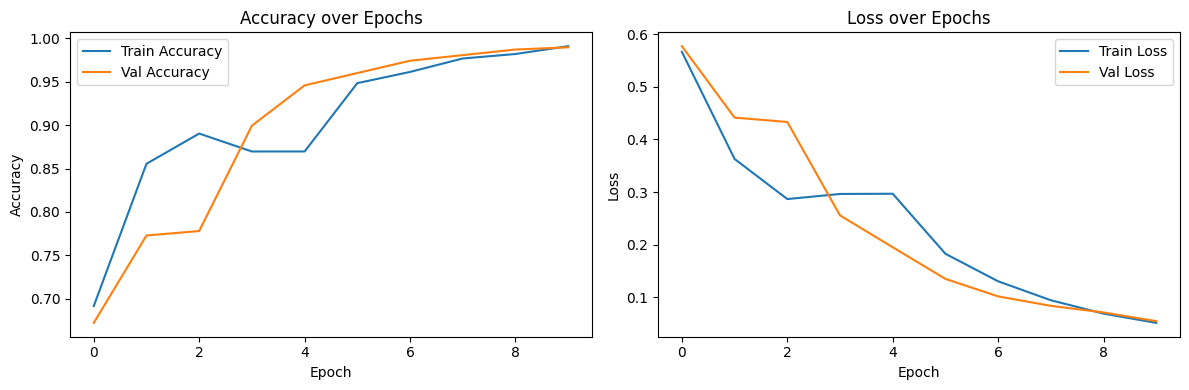

In [11]:
# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
# Collect predictions
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.round(preds).flatten())

1/1 [==============================] - 0s 56ms/step


In [13]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Not Train', 'Train']))


Classification Report:
              precision    recall  f1-score   support

   Not Train       0.99      1.00      0.99       422
       Train       0.99      0.98      0.99       353

    accuracy                           0.99       775
   macro avg       0.99      0.99      0.99       775
weighted avg       0.99      0.99      0.99       775



In [14]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
labels = ['Not Train', 'Train']

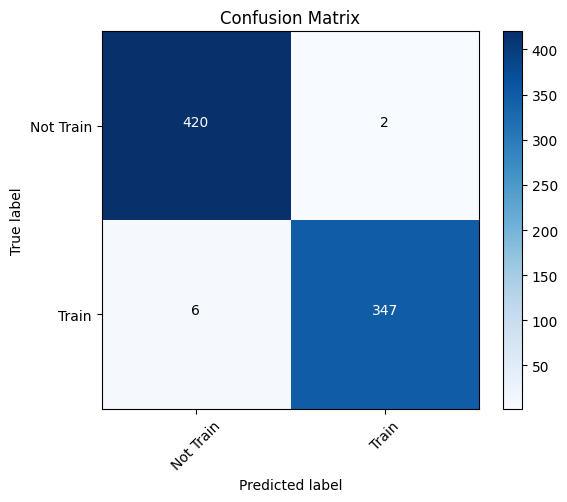

In [15]:
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

plot_confusion_matrix(cm, labels)
plt.show()

In [16]:
model.save(r"C:\Users\nisal\Downloads\IoT\ClassificationModel\train_classifier_model")

INFO:tensorflow:Assets written to: C:\Users\nisal\Downloads\IoT\ClassificationModel\train_classifier_model\assets


INFO:tensorflow:Assets written to: C:\Users\nisal\Downloads\IoT\ClassificationModel\train_classifier_model\assets
